<a href="https://colab.research.google.com/github/shettyarjun/machine-learning-bike-VS-Car-/blob/main/BIkeVSCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation,Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, SpatialDropout2D,Activation
from tensorflow.keras import regularizers, optimizers , layers
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt

# from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model

from glob import glob
from PIL import Image
import random
import cv2



In [ ]:
from google.colab import drive
import os

# Replace '/content/drive/My Drive/path/to/your/folder' with the actual path to your folder
folder_path = '/content/drive/MyDrive/BikeVsCar'

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (338).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (329).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (323).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (328).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (340).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (321).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (333).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (316).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (318).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (325).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (34).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (334).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (326).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/Bike (319).jpeg
/conten

/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1813).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1809).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1811).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1806).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1800).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1821).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (18).jpg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1810).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1801).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1820).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1823).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1808).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1802).jpeg
/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/Car (1812).jpeg
/content/drive/MyDrive/

# display random images of each class


In [ ]:
def plotImages2(multipleImages):
    r = random.sample(multipleImages, 9)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(332)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(333)
    plt.imshow(cv2.imread(r[2])); plt.axis('off')
    plt.subplot(334)
    plt.imshow(cv2.imread(r[3])); plt.axis('off')
    plt.subplot(335)
    plt.imshow(cv2.imread(r[4])); plt.axis('off')
    plt.subplot(336)
    plt.imshow(cv2.imread(r[5])); plt.axis('off')
    plt.subplot(337)
    plt.imshow(cv2.imread(r[6])); plt.axis('off')
    plt.subplot(338)
    plt.imshow(cv2.imread(r[7])); plt.axis('off')
    plt.subplot(339)
    plt.imshow(cv2.imread(r[8])); plt.axis('off')


# random generate bike from dataset

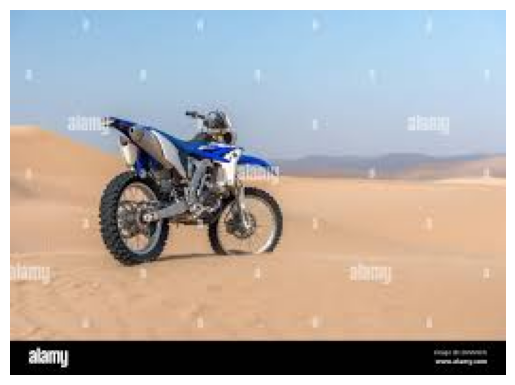

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Use glob to get a list of image file paths
bike_paths = glob.glob('/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike/*.jpeg')

# Function to display a single random image
def plotRandomImage(image_paths):
    if image_paths:
        random_image_path = random.choice(image_paths)
        img = mpimg.imread(random_image_path)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print("No bike images found in the directory.")

# Call the function to display a random bike image
plotRandomImage(bike_paths)



# random generate car from dataset

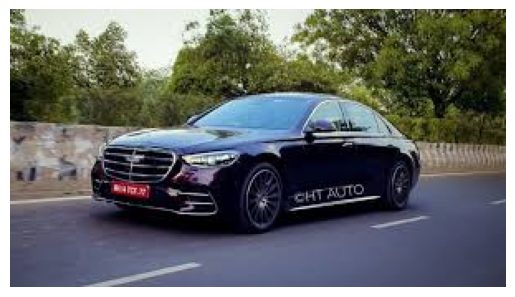

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Use glob to get a list of image file paths
car_paths = glob.glob('/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car/*.jpeg')

# Function to display a single random car image
def plotRandomCarImage(image_paths):
    if image_paths:
        random_image_path = random.choice(image_paths)
        img = mpimg.imread(random_image_path)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print("No car images found in the directory.")

# Call the function to display a random car image
plotRandomCarImage(car_paths)


# image preprocessing

get average sizes of all images

In [ ]:
import os
import PIL
from PIL import Image

def images_avg_size(dir_path):
    widths = []
    heights = []

    for img_name in os.listdir(dir_path):
        if img_name.endswith(".jpg") or img_name.endswith(".png") or img_name.endswith(".jpeg") or img_name.endswith(".bmp"):
            img_path = os.path.join(dir_path, img_name)
            im = Image.open(img_path)
            widths.append(im.size[0])
            heights.append(im.size[1])

    if len(heights) > 0:
        AVG_HEIGHT = round(sum(heights) / len(heights))
        AVG_WIDTH = round(sum(widths) / len(widths))
        print(f"Average Height: {AVG_HEIGHT}")
        print(f"Average Width: {AVG_WIDTH}")
    else:
        print(f"No image files found in the directory: {dir_path}")

# Paths to bike and car directories
bike_directory_path = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Bike'
car_directory_path = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/Car'

print('Average for bikes:')
images_avg_size(bike_directory_path)

print('Average for cars:')
images_avg_size(car_directory_path)


Average for bikes:
Average Height: 226
Average Width: 307
Average for cars:
Average Height: 190
Average Width: 285


# Split Folders to training , Validation ,and testing

this process is optional, or you can a dataset with preordered into test, train, validate

there are two folders test,train and cal as in the car-bike-dataset, there was an error as i had not divided the directories

In [ ]:
!pip install split-folders
import splitfolders

# Define the source directory (original dataset)
source_dir = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset'  # Update this to your dataset path

# Define the output directory where the split data will be saved
output_dir = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset'  # Update this to your desired output path

# Define the desired split ratios
split_ratios = (0.8, 0.1, 0.1)  # Train:Val:Test

# Split the data into "train2," "val2," and "test2" with subdirectories for "Car" and "Bike"
splitfolders.ratio(source_dir, output=output_dir, seed=1337, ratio=split_ratios, group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  2.54 files/s]
Copying files: 13 files [00:00, 33.35 files/s]
Copying files: 22 files [00:00, 40.41 files/s]
Copying files: 29 files [00:01, 14.73 files/s]
Copying files: 39 files [00:01, 22.89 files/s]
Copying files: 53 files [00:01, 36.92 files/s]
Copying files: 64 files [00:02, 47.55 files/s]
Copying files: 74 files [00:02, 55.98 files/s]
Copying files: 87 files [00:02, 70.28 files/s]
Copying files: 98 files [00:02, 74.66 files/s]
Copying files: 109 files [00:02, 81.44 files/s]
Copying files: 122 files [00:02, 90.10 files/s]
Copying files: 133 files [00:02, 93.49 files/s]
Copying files: 144 files [00:02, 91.99 files/s]
Copying files: 158 files [00:02, 99.45 files/s]
Copying files: 171 files [00:03, 106.36 files/s]
Copying files: 183 files [00:03, 108.43 files/s]
Copying files: 195 files [00:03, 110.42 files/s]
Copying files: 207 files [00:03, 112.29 files/s]
Copying files: 220 files [00:03, 115.80 files/s]
Cop

In [ ]:
# Define directory paths for your training, validation, and test data
TRAIN_DIR = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/train'
VAL_DIR = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/val'
TEST_DIR = '/content/drive/MyDrive/BikeVsCar/Car-Bike-Dataset/test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation and rescaling for training data
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Define the data augmentation for validation and test data (only rescaling)
val_gen = ImageDataGenerator(rescale=1.0/255.0)
test_gen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators for training, validation, and test data
train_generator = train_gen.flow_from_directory(
    TRAIN_DIR,
    color_mode="rgb",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_ds = val_gen.flow_from_directory(
    VAL_DIR,
    color_mode="rgb",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_ds = test_gen.flow_from_directory(
    TEST_DIR,
    color_mode="rgb",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 3264 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


# Model Arch Build

In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.3, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(renorm=True))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(renorm=True))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(renorm=True))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(renorm=True))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(renorm=True))

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


In [ ]:
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 activation (Activation)     (None, 126, 126, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 63, 63, 64)        448       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0

# now to train the model

In [ ]:
# Define the number of training epochs
epochs = 30  # You can adjust this number as needed

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=val_ds, callbacks=callbacks_list)


Epoch 1/30
102/102 [==============================] - 29s 281ms/step - loss: 0.2255 - accuracy: 0.9087 - recall: 0.9336 - precision: 0.8916 - val_loss: 0.8390 - val_accuracy: 0.7181 - val_recall: 0.4444 - val_precision: 1.0000 - lr: 0.0010
Epoch 2/30
102/102 [==============================] - 28s 278ms/step - loss: 0.4379 - accuracy: 0.8361 - recall: 0.8170 - precision: 0.8536 - val_loss: 0.2479 - val_accuracy: 0.9069 - val_recall: 0.8551 - val_precision: 0.9568 - lr: 0.0010
Epoch 3/30
102/102 [==============================] - 29s 279ms/step - loss: 0.4005 - accuracy: 0.8581 - recall: 0.8792 - precision: 0.8470 - val_loss: 0.1187 - val_accuracy: 0.9461 - val_recall: 0.9372 - val_precision: 0.9557 - lr: 0.0010
Epoch 4/30
102/102 [==============================] - 28s 279ms/step - loss: 0.1826 - accuracy: 0.9259 - recall: 0.9251 - precision: 0.9285 - val_loss: 0.1183 - val_accuracy: 0.9510 - val_recall: 0.9517 - val_precision: 0.9517 - lr: 0.0010
Epoch 5/30
102/102 [====================

simple save in the drive

In [ ]:
model.save('first_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# prediction

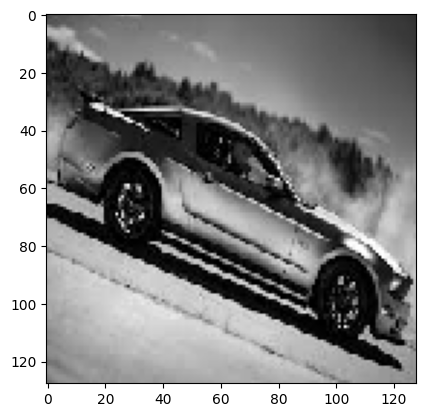

1.0
1/1 [==============================] - 0s 20ms/step

the above vehicle is predicted as ===> Car


In [ ]:
# Load an image from the test dataset
sample = test_ds.next()
n = 6
plt.imshow(sample[0][n])
plt.show()
print(sample[1][n])

# Get the image for prediction
img = sample[0][n]
img_array = tf.expand_dims(img, 0)  # Create a batch axis

# Make predictions using the model (IMPORTANT)
predictions = model.predict(img_array)
score = predictions[0]

# Determine the predicted class based on the score
if score >= 0.5:
    vehicle_class = "Car"
else:
    vehicle_class = "Bike"

print("")
# Display the predicted class as text on the image
print("the above vehicle is predicted as ===>", vehicle_class)
